In [1]:
#Import necessary Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#Dictionnary of features
columns_dict = {
    'AAGE': 'age',
    'ACLSWKR': 'class of worker',
    'ADTIND': 'industry code',
    'ADTOCC' : 'occupation code',
    'AHGA' : 'education',
    'AHRSPAY': 'wage per Hour',
    'AHSCOL' : 'enrolled in edu inst last wk', 
    'AMARITL' : 'marital status',
    'AMJIND' : 'major industry code',
    'AMJOCC' : 'major occupation code',
    'ARACE' : 'race',
    'AREORGN': 'hispanic Origin',
    'ASEX': 'sex',
    'AUNMEM': 'member of a labor union',
    'AUNTYPE': 'reason for unemployment',
    'AWKSTAT': 'full or part time employment stat',
    'CAPGAIN': 'capital gains',
    'CAPLOSS' : 'capital losses',
    'DIVVAL': 'divdends from stocks',
    'FILESTAT': 'tax filer status',
    'GRINREG': 'region of previous residence',
    'GRINST': 'state of previous residence',
    'HHDFMX': 'detailed household and family stat',
    'MARSUPWT' : 'instance Weight',
    'HHDREL': 'detailed household summary in household',
    'MIGMTR1': 'migration code-change in msa',
    'MIGMTR3': 'migration code-change in reg',
    'MIGMTR4': 'migration code-move within reg',
    'MIGSAME': 'live in this house 1 year ago',
    'MIGSUN': 'migration prev res in sunbelt',
    'NOEMP': 'num persons worked for employer',
    'PARENT': 'family members under 18',
    'PEFNTVTY': 'country of birth father',
    'PEMNTVTY': 'country of birth mother',
    'PENATVTY': 'country of birth self',
    'PRCITSHP': 'citizenship',
    'SEOTR': 'own business or self employed',
    'VETQVA': "fill inc questionnaire for veteran's admin",
    'VETYN': 'veterans benefits',
    'WKSWORK': 'weeks worked in year',
    'year': 'year',
    'salary': 'salary above 50000 or less than 50000'
}

In [3]:
## Load the Train and Test Datasets

In [24]:
df_train = pd.read_csv('./census_income_learn.csv', names= ['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA','AHRSPAY','AHSCOL', 'AMARITL',
                                                             'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN',
                                                            'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 
                                                            'DIVVAL', 'FILESTAT', 'GRINREG', 'GRINST','HHDFMX','HHDREL', 'MARSUPWT',
                                                            'MIGMTR1','MIGMTR3','MIGMTR4','MIGSAME','MIGSUN','NOEMP','PARENT','PEFNTVTY', 'PEMNTVTY',
                                                            'PENATVTY','PRCITSHP','SEOTR','VETQVA','VETYN','WKSWORK','year','salary'])

In [25]:
df_test = pd.read_csv('./census_income_test.csv', names= ['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA','AHRSPAY','AHSCOL', 'AMARITL',
                                                             'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN',
                                                            'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 
                                                            'DIVVAL', 'FILESTAT', 'GRINREG', 'GRINST','HHDFMX','HHDREL', 'MARSUPWT',
                                                            'MIGMTR1','MIGMTR3','MIGMTR4','MIGSAME','MIGSUN','NOEMP','PARENT','PEFNTVTY', 'PEMNTVTY',
                                                            'PENATVTY','PRCITSHP','SEOTR','VETQVA','VETYN','WKSWORK','year','salary'])

In [6]:
## Training and testing Dataset Statistics

In [26]:
print('training set count of (rows, columns):', df_train.shape)
print('testing set count of (rows, columns) :', df_test.shape)

training set count of (rows, columns): (199523, 42)
testing set count of (rows, columns) : (99762, 42)


In [27]:
# See the first 5 rows of the training set
df_train.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,year,salary
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [28]:
## Comparison with informations in metadata File

In [29]:
for col in df_train.columns:
    print(len(df_train[col].unique()), 'distinct values for attribute ', col, '(',columns_dict[col] ,')')

91 distinct values for attribute  AAGE ( age )
9 distinct values for attribute  ACLSWKR ( class of worker )
52 distinct values for attribute  ADTIND ( industry code )
47 distinct values for attribute  ADTOCC ( occupation code )
17 distinct values for attribute  AHGA ( education )
1240 distinct values for attribute  AHRSPAY ( wage per Hour )
3 distinct values for attribute  AHSCOL ( enrolled in edu inst last wk )
7 distinct values for attribute  AMARITL ( marital status )
24 distinct values for attribute  AMJIND ( major industry code )
15 distinct values for attribute  AMJOCC ( major occupation code )
5 distinct values for attribute  ARACE ( race )
10 distinct values for attribute  AREORGN ( hispanic Origin )
2 distinct values for attribute  ASEX ( sex )
3 distinct values for attribute  AUNMEM ( member of a labor union )
6 distinct values for attribute  AUNTYPE ( reason for unemployment )
8 distinct values for attribute  AWKSTAT ( full or part time employment stat )
132 distinct values 

# Data Analysis and Exploration

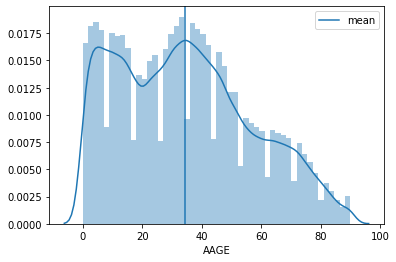

In [8]:
# Age Distribution
sns.distplot(df_train.AAGE)
plt.axvline(df_train.AAGE.mean(), label='mean')
plt.legend()
plt.show()

mapping between labels and encoders {'HHDREL': {' Child 18 or older': 1, ' Child under 18 ever married': 2, ' Child under 18 never married': 3, ' Group Quarters- Secondary individual': 4, ' Householder': 5, ' Nonrelative of householder': 6, ' Other relative of householder': 7, ' Spouse of householder': 8}}


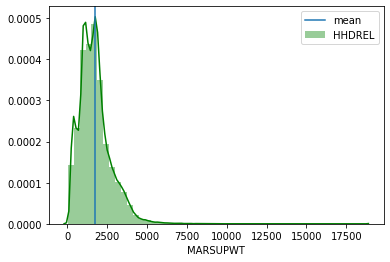

In [45]:
# Detailed household summary in household Distribution

# Encode the different labels of the column HHDREL in order to visualize it
labels = df_train['HHDREL'].astype('category').cat.categories.tolist()
replace_map_comp = {'HHDREL' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print('mapping between labels and encoders', replace_map_comp)
df_replace = df_train.copy()
df_replace.replace(replace_map_comp, inplace=True)

sns.distplot(df_replace.MARSUPWT, label=replace_map_comp, color='green')
plt.axvline(df_replace.MARSUPWT.mean(), label='mean')
plt.legend()
plt.show()

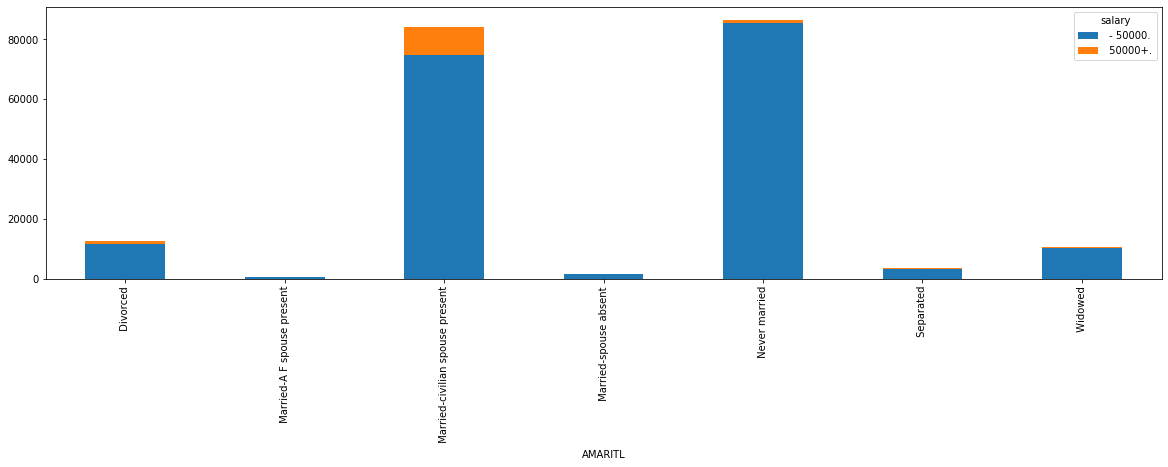

In [46]:
# Distribution of Marital status in function of Salary
df_train.groupby(['AMARITL','salary']).size().unstack().plot(kind='bar',stacked=True, figsize=(20,5))
plt.show()

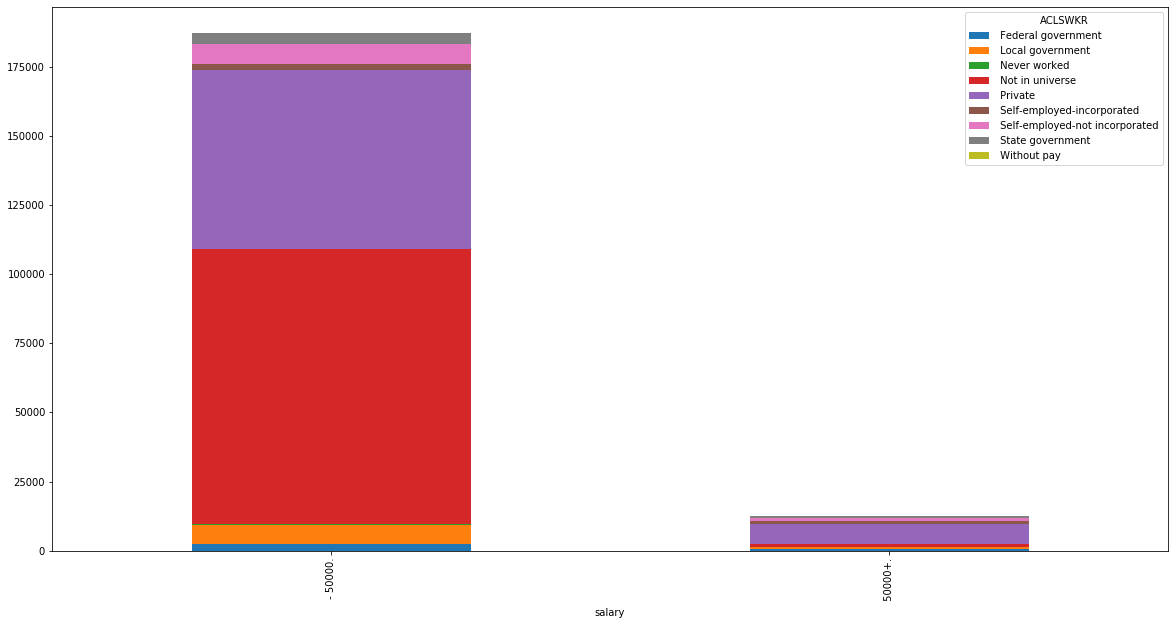

In [61]:
# Distribution of Salary inf funtion of Class of Workers
df_train.groupby(['salary', 'ACLSWKR']).size().unstack().plot(kind='bar',stacked=True, figsize=(20,10))
plt.show()

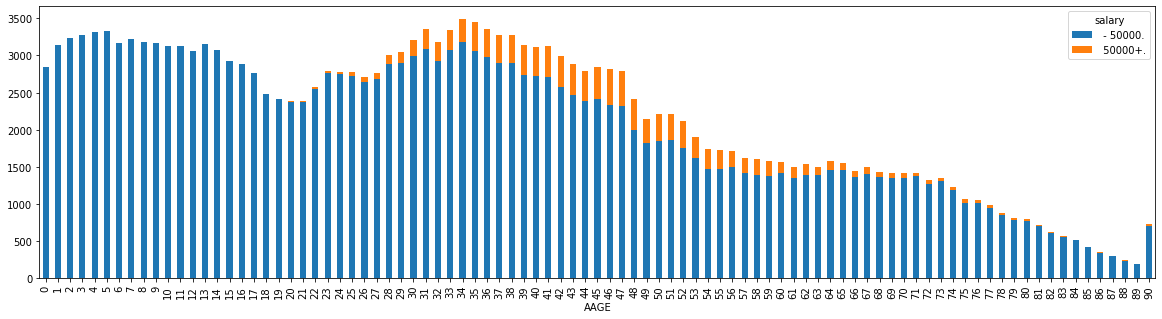

In [47]:
# Distribution of AGE in function of SALARY
df_train.groupby(['AAGE','salary']).size().unstack().plot(kind='bar',stacked=True, figsize=(20,5))
plt.show()

{'ACLSWKR': {' Federal government': 1, ' Local government': 2, ' Never worked': 3, ' Not in universe': 4, ' Private': 5, ' Self-employed-incorporated': 6, ' Self-employed-not incorporated': 7, ' State government': 8, ' Without pay': 9}}


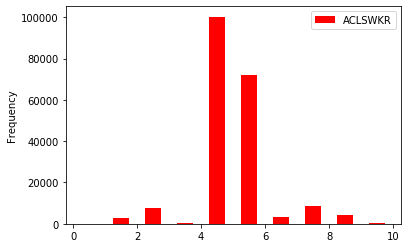

In [49]:
# Distribution of Class of Workers
# Encode the labels of class of Workers in order to visualize it
labels = df_train['ACLSWKR'].astype('category').cat.categories.tolist()
replace_map_comp = {'ACLSWKR' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp)

df_replace = df_train.copy()
df_replace.replace(replace_map_comp, inplace=True)
df_replace[['ACLSWKR']].plot(kind='hist',bins=[0,1,2,3,4,5,6,7,8,9,10],rwidth=0.5, color='red')
plt.show()

{'PRCITSHP': {' Foreign born- Not a citizen of U S ': 1, ' Foreign born- U S citizen by naturalization': 2, ' Native- Born abroad of American Parent(s)': 3, ' Native- Born in Puerto Rico or U S Outlying': 4, ' Native- Born in the United States': 5}}


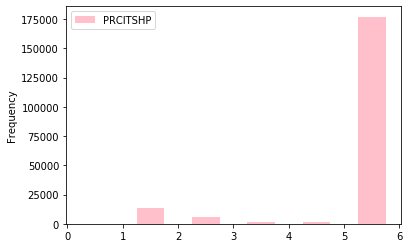

In [51]:
#Encoding of the column Citizenship

labels = df_train['PRCITSHP'].astype('category').cat.categories.tolist()
replace_map_comp_citizenship = {'PRCITSHP' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp_citizenship)
df_replace_cit = df_train.copy()
df_replace_cit.replace(replace_map_comp_citizenship, inplace=True)

#Visualization of the column Citizenship
df_replace_cit[['PRCITSHP']].plot(kind='hist',bins=[0,1,2,3,4,5,6],rwidth=0.5, color='pink')
plt.show()

In [52]:
# Encode the categorical columns of the input data in order to see the correlation between the features
X = df_train.copy()
# Categorical boolean mask
categorical_feature_mask = X.dtypes==object 
categorical_feature_cat = X.dtypes=='category'
# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist() + X.columns[categorical_feature_cat].tolist()

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))

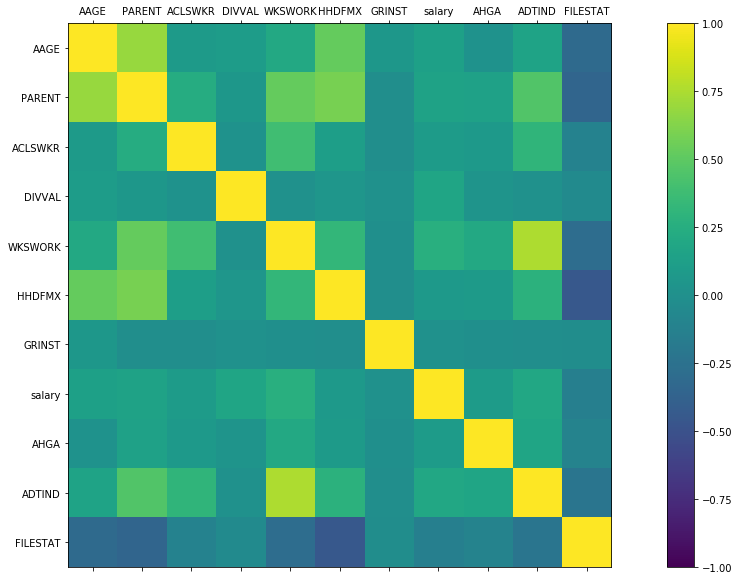

In [53]:
# Correlation plot 
names = ['AAGE','PARENT', 'ACLSWKR','DIVVAL','WKSWORK','HHDFMX','GRINST','salary','AHGA', 'ADTIND', 'FILESTAT']
data = X[['AAGE','PARENT', 'ACLSWKR','DIVVAL','WKSWORK','HHDFMX','GRINST','salary','AHGA', 'ADTIND', 'FILESTAT']]
correlations = data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

Interpretations :
We can notice here clearly that the feature FILESTAT is not or badly correlated to the label salary.
There is an important correlation between the features WKSWORK, DIVVAL, ADTIND, PARENT and AAGE and the label salary (42th Variable).